In [3]:
import numpy as np
import matplotlib.pyplot as plt



In [69]:
#component_photons = np.random.multinomial(1000000, (.3,.7))
#print(f'component_photons: {component_photons}')
#photon_times = np.random.exponential(scale=1.4, size=10000)
#np.random.poisson(background, size=time_bins)
times,counts = simulate_multi_exponential_decay(num_photons=10000,
                                                  lifetimes = (0.2,5.0), 
                                                  amplitudes = (100,200), 
                                                  time_range = (0,12.4), 
                                                  time_bins=256, 
                                                  background=0)
times


component_photons: [3317 6683]
len all photons:3317
len all photons:10000
num photons out of time range: 589


array([ 0.02421875,  0.07265625,  0.12109375,  0.16953125,  0.21796875,
        0.26640625,  0.31484375,  0.36328125,  0.41171875,  0.46015625,
        0.50859375,  0.55703125,  0.60546875,  0.65390625,  0.70234375,
        0.75078125,  0.79921875,  0.84765625,  0.89609375,  0.94453125,
        0.99296875,  1.04140625,  1.08984375,  1.13828125,  1.18671875,
        1.23515625,  1.28359375,  1.33203125,  1.38046875,  1.42890625,
        1.47734375,  1.52578125,  1.57421875,  1.62265625,  1.67109375,
        1.71953125,  1.76796875,  1.81640625,  1.86484375,  1.91328125,
        1.96171875,  2.01015625,  2.05859375,  2.10703125,  2.15546875,
        2.20390625,  2.25234375,  2.30078125,  2.34921875,  2.39765625,
        2.44609375,  2.49453125,  2.54296875,  2.59140625,  2.63984375,
        2.68828125,  2.73671875,  2.78515625,  2.83359375,  2.88203125,
        2.93046875,  2.97890625,  3.02734375,  3.07578125,  3.12421875,
        3.17265625,  3.22109375,  3.26953125,  3.31796875,  3.36

component_photons: [6967 3033]
len all photons:6967
len all photons:10000
num photons out of time range: 326

Biexponential Decay Analysis Results:
True lifetimes: [4, 1] ns
True amplitude fractions: [0.7, 0.3]
Total photons detected: 9674 multi
0.7
0
0.3
0
max counts:224


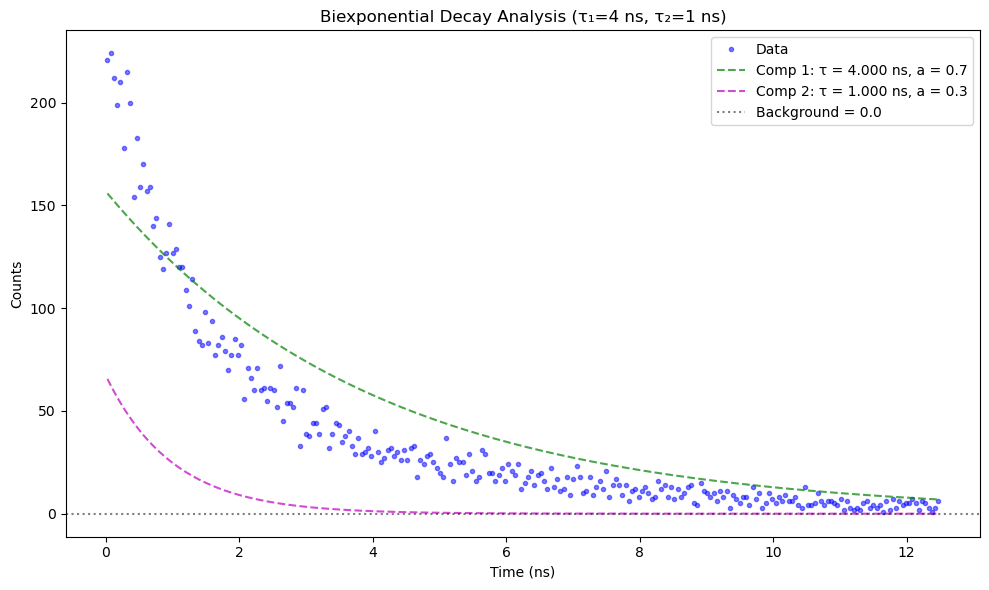

In [ ]:
def simulate_multi_exponential_decay(num_photons, lifetimes, amplitudes, time_range, time_bins=256, background=0):
    """
    Simulate a multi-exponential fluorescence decay curve.
    
    Parameters:
    -----------
    num_photons : int
        Total number of photons to simulate
    lifetimes : list of float
        Lifetimes in nanoseconds for each component
    amplitudes : list of float
        Relative amplitudes for each component (will be normalized)
    time_range : tuple
        (min_time, max_time) in nanoseconds
    time_bins : int
        Number of time bins to use
    background : float
        Expected background counts per bin
        
    Returns:
    --------
    times : numpy array
        Time points of the simulation
    counts : numpy array
        Photon counts at each time point
    """

    min_time, max_time = time_range
    
    # Normalize amplitudes to sum to 1
    norm_amplitudes = np.array(amplitudes) / np.sum(amplitudes)

    # Determine number of photons for each component
    component_photons = np.random.multinomial(num_photons, norm_amplitudes)
    print(f'component_photons: {component_photons}')
    
    # Initialize empty array for all photon arrival times
    all_photon_times = np.array([])
    
    # Generate photons for each lifetime component
    for i, (lifetime, n_photons) in enumerate(zip(lifetimes, component_photons)):
        if n_photons > 0:
            # Generate arrival times for this component
            photon_times = np.random.exponential(scale=lifetime, size=n_photons)
            all_photon_times = np.append(all_photon_times, photon_times)
            print(f"len all photons:{len(all_photon_times)}")
    # Filter out photons outside the time range
    print(f'num photons out of time range: {sum(all_photon_times > max_time)}')
    all_photon_times = all_photon_times[all_photon_times <= max_time]

    
    # Create the binned histogram
    bin_edges = np.linspace(min_time, max_time, time_bins + 1)
    counts, _ = np.histogram(all_photon_times, bins=bin_edges)
    
    # Calculate bin centers for time axis
    times = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    
    # Add random background counts if specified
    if background > 0:
        bg_counts = np.random.poisson(background, size=time_bins)
        counts = counts + bg_counts
        print(f'total counts without background: {sum(counts-bg_counts)}')
    
    return times, counts

def plot_multi_exponential_decay(times, counts,lifetimes,background, amplitudes, log_scale=True, 
                                 title="Multi-exponential Fluorescence Decay"):
    """
    Plot the multi-exponential lifetime decay curve with fit and components.
    
    Parameters:
    -----------
    times : numpy array
        Time points
    counts : numpy array
        Count data
    log_scale : bool
        Whether to use log scale for y-axis
    residuals : bool
        Whether to plot residuals
    title : str
        Plot title
    
    Returns:
    --------
    fig : matplotlib figure
        The figure object containing the plot
    """
    fig, ax1 = plt.subplots(figsize=(10, 6))
    # Plot data
    ax1.plot(times, counts, 'b.', alpha=0.5, label='Data')
    
    n_components = len(lifetimes)
        
    # Plot individual components scaled based on max counts
    colors = ['g', 'm', 'c', 'y', 'orange']  # Colors for different components
    for i in range(n_components):
        component = max(counts)*amplitudes[i] * np.exp(-times / lifetimes[i]) + background
        print(amplitudes[i])
        print(background)
        ax1.plot(times, component, '--', color=colors[i % len(colors)], alpha=0.7,
                label=f'Comp {i+1}: τ = {lifetimes[i]:.3f} ns, a = {amplitudes[i]}')
    print(f'max counts:{max(counts)}')
    
    # Add background line
    ax1.axhline(y=background, color='k', linestyle=':', alpha=0.5, label=f'Background = {background:.1f}')
    
        
    ax1.set_xlabel('Time (ns)')
    ax1.set_ylabel('Counts')
    ax1.set_title(title)
    ax1.legend(loc='upper right')
    
    if log_scale:
        ax1.set_yscale('log')
    
       
    plt.tight_layout()
    
    return fig
   
if __name__ == "__main__":
    
    # Create a new biexponential decay example with known parameters
    num_photons = 10000  
    true_lifetimes = [4,1]  # Two lifetime components (in ns)
    true_amplitudes = [0.7,0.3]  # Relative amplitudes (70% and 30%)
    time_range = (0, 12.5)  # nanoseconds
    time_bins = 256
    #background_level = (num_photons*0.2)/256 #background counts per bin
    background_level = 0
    
    # Simulate the biexponential decay
    times_multi, counts_multi = simulate_multi_exponential_decay(
        num_photons=num_photons,
        lifetimes=true_lifetimes,
        amplitudes=true_amplitudes,
        time_range=time_range,
        time_bins=time_bins,
        background=background_level
    )
    
    
    
    # Display the results
    print("\nBiexponential Decay Analysis Results:")
    print(f"True lifetimes: {true_lifetimes} ns")
    print(f"True amplitude fractions: {true_amplitudes}")
    print(f"Total photons detected: {np.sum(counts_multi)} multi")
  
    # Plot the results
    fig = plot_multi_exponential_decay(
        times_multi, 
        counts_multi, 
        lifetimes=true_lifetimes,
        amplitudes=true_amplitudes,
        background=background_level,
        log_scale=False, 
        title=f"Biexponential Decay Analysis (τ₁={true_lifetimes[0]} ns, τ₂={true_lifetimes[1]} ns)"
    )
    '''
    # Try fitting with different number of components
    print("\nTrying to fit with 3 components (when true model is 2 components)...")
    analysis_result_3comp = analyze_multi_exponential_decay(
        times_multi, 
        counts_multi, 
        n_components=3
    )
    
    # Plot the 3-component fit for comparison
    fig3 = plot_multi_exponential_decay(
        times_multi, 
        counts_multi, 
        analysis_result_3comp,
        log_scale=True, 
        residuals=True,
        title="Testing 3-Component Fit (when true model is 2 components)"
    )
    '''
    plt.show()



USING MULTI EXP MODEL


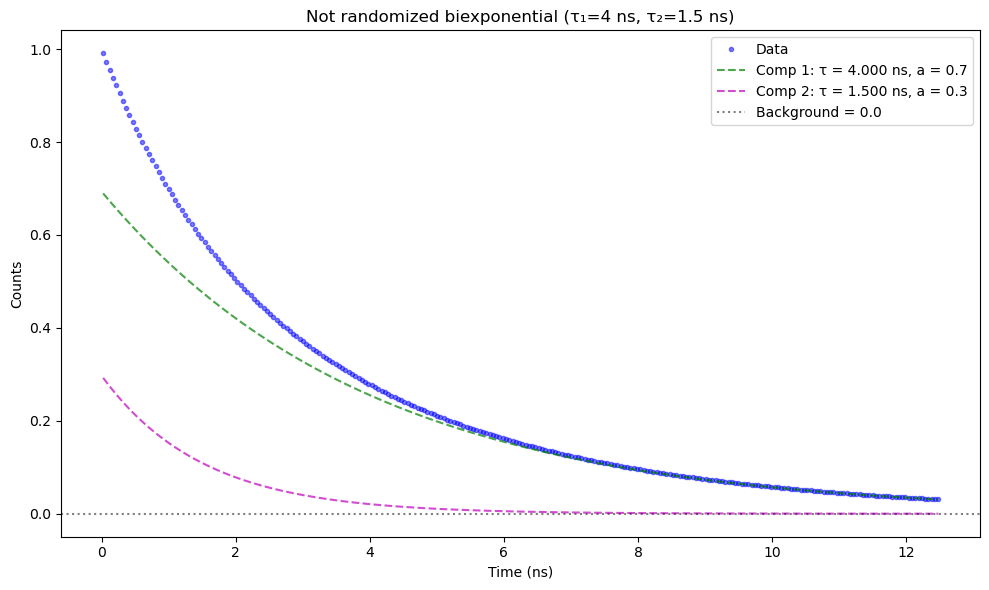

In [ ]:

####
#
#IGNORE WAS FOR TESTING
#
#


def multi_exponential_model(t, lifetimes,amplitudes,background):
    """
    Multi-exponential decay model with background.
    
    Parameters:
    t : time
    params : tuple containing:
        - amplitudes (a1, a2, ..., an)
        - lifetimes (tau1, tau2, ..., taun)
        - background constant c
    
    Returns:
    --------
    Decay curve values at times t
    """
    n_components = (len(lifetimes))
    
    
    result = background
    for i in range(n_components):
        result += amplitudes[i] * np.exp(-t / lifetimes[i])
    print('USING MULTI EXP MODEL')
    return result



#direct estimate (i.e. not randomized)
lifetimecurve = multi_exponential_model(times_multi,true_lifetimes, true_amplitudes, background_level)

fig = plot_multi_exponential_decay(
        times_multi, 
        lifetimecurve, 
        lifetimes=true_lifetimes,
        amplitudes=true_amplitudes,
        background=background_level,
        log_scale=False, 
        title=f"Not randomized biexponential (τ₁={true_lifetimes[0]} ns, τ₂={true_lifetimes[1]} ns)"
    )

In [ ]:
import json
import numpy as np
import tifffile

# Helper class to handle NumPy arrays in JSON serialization
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        if isinstance(obj, np.number):
            return float(obj)
        return json.JSONEncoder.default(self, obj)

def export_decay_data_as_3d_tiff(times, counts, filename="decay_data_3d.tiff",
                               normalize=False, time_dimension_first=True, box_size=(40, 40)):
    """
    Export fluorescence lifetime decay data as a 3D TIFF image stack with the same decay 
    curve repeated across a 2D image of specified size.
   
    Parameters:
    -----------
    times : numpy array
        Time points of the decay curve (nanoseconds)
    counts : numpy array
        Count data of the decay curve
    filename : str
        Output filename for the 3D TIFF image
    normalize : bool
        Whether to normalize the counts to 0-65535 range (16-bit)
    time_dimension_first : bool
        If True, time is the first dimension (Z), otherwise it's the last
    box_size : tuple
        Size of the 2D image (width, height) to repeat the decay curve across
   
    Returns:
    --------
    str : Path to the saved file
    """
    try:
        import tifffile
        import numpy as np
    except ImportError:
        print("This function requires the 'tifffile' package. Please install it with:")
        print("pip install tifffile")
        return None
   
    # Make sure data is in numpy arrays
    times = np.asarray(times)
    counts = np.asarray(counts)
   
    # Create a 3D array where:
    # - First dimension (Z) represents time points if time_dimension_first=True
    # - Other dimensions represent spatial coordinates (X, Y) = box_size
    
    width, height = box_size
    
    if time_dimension_first:
        # Time as first dimension (Z)
        # Create a single time slice with the spatial dimensions
        single_slice = np.ones((width, height))
        
        # Create the 3D volume by multiplying each time point's count with the spatial template
        data_3d = np.zeros((len(counts), width, height), dtype=float)
        for t in range(len(counts)):
            data_3d[t, :, :] = single_slice * counts[t]
    else:
        # Time as last dimension
        # Each pixel contains the same decay curve
        data_3d = np.zeros((width, height, len(counts)), dtype=float)
        for x in range(width):
            for y in range(height):
                data_3d[x, y, :] = counts
   
    # Normalize to 16-bit range if requested
    if normalize:
        # Scale to 0-65535 (full 16-bit range)
        min_val = np.min(data_3d)
        max_val = np.max(data_3d)
        if max_val > min_val:  # Prevent division by zero
            data_3d = ((data_3d - min_val) / (max_val - min_val) * 65535).astype(np.uint16)
        else:
            data_3d = np.zeros_like(data_3d, dtype=np.uint16)
   
    #put decay into empty 256x256
    blankarr = np.zeros((256,256,256))
    print(data_3d.shape)
    blankarr[:,127-box_size[0]//2:127+box_size[0]//2,127-box_size[1]//2:127+box_size[1]//2] =data_3d
    data_3d = blankarr

    # Save metadata about the time axis
    metadata = {
        'time_points': times,
        'time_unit': 'nanoseconds',
        'min_time': times[0],
        'max_time': times[-1],
        'time_step': times[1] - times[0] if len(times) > 1 else 0,
        'box_size': box_size,
        'description': 'Decay curve repeated across a 2D image'
    }
   
    # Convert metadata to string for embedding in TIFF tags
    metadata_str = json.dumps(metadata, cls=NumpyEncoder)
   
    # Save as TIFF with metadata
    tifffile.imwrite(
        filename,
        data_3d,
        metadata={'time_info': metadata_str},
        imagej=False,  # Make it compatible with ImageJ/Fiji
        resolution=(1.0, 1.0),  # Placeholder resolution
        photometric='minisblack',
        compression='lzw'  # Lossless compression
    )
   
    print(f"Decay data exported as 3D TIFF with dimensions {data_3d.shape}: {filename}")
    
    # Also save a simple CSV with the raw decay curve data
    csv_filename = filename.replace('.tiff', '.csv').replace('.tif', '.csv')
    np.savetxt(csv_filename, np.column_stack((times, counts)),
              delimiter=',', header='Time(ns),Counts', comments='')
   
    print(f"Raw decay data saved as CSV: {csv_filename}")
    
    return filename

# Example usage:
export_decay_data_as_3d_tiff(times_multi, counts_multi, f"G:\\MNtissueproject_CLEANED20250716\\biexponential_simulations\\MULTI_t1_{true_lifetimes[0]}_t2_{true_lifetimes[1]}_data.tif", box_size=(40, 40))


(256, 40, 40)
Decay data exported as 3D TIFF with dimensions (256, 256, 256): G:\MNtissueproject_CLEANED20250716\biexponential_simulations\MULTI_t1_1.1_t2_1_data.tiff
Raw decay data saved as CSV: G:\MNtissueproject_CLEANED20250716\biexponential_simulations\MULTI_t1_1.1_t2_1_data.csv


'G:\\MNtissueproject_CLEANED20250716\\biexponential_simulations\\MULTI_t1_1.1_t2_1_data.tiff'

In [51]:
import json
import numpy as np
import tifffile

# Helper class to handle NumPy arrays in JSON serialization
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        if isinstance(obj, np.number):
            return float(obj)
        return json.JSONEncoder.default(self, obj)

def export_decay_3d_withnoise(times,decay3dblock, filename="decay_data_3d.tiff",
                               normalize=False, time_dimension_first=True, box_size=(40, 40)):
    data_3d = decay3dblock
   
    # Normalize to 16-bit range if requested
    if normalize:
        # Scale to 0-65535 (full 16-bit range)
        min_val = np.min(data_3d)
        max_val = np.max(data_3d)
        if max_val > min_val:  # Prevent division by zero
            data_3d = ((data_3d - min_val) / (max_val - min_val) * 65535).astype(np.uint16)
        else:
            data_3d = np.zeros_like(data_3d, dtype=np.uint16)
   
    #put decay into empty 256x256
    blankarr = np.zeros((256,256,256))
    print(data_3d.shape)
    blankarr[:,127-box_size[0]//2:127+box_size[0]//2,127-box_size[1]//2:127+box_size[1]//2] =data_3d
    data_3d = blankarr

    # Save metadata about the time axis
    metadata = {
        'time_points': times,
        'time_unit': 'nanoseconds',
        'min_time': times[0],
        'max_time': times[-1],
        'time_step': times[1] - times[0] if len(times) > 1 else 0,
        'box_size': box_size,
        'description': 'Decay curve repeated across a 2D image'
    }
   
    # Convert metadata to string for embedding in TIFF tags
    metadata_str = json.dumps(metadata, cls=NumpyEncoder)
   
    # Save as TIFF with metadata
    tifffile.imwrite(
        filename,
        data_3d,
        metadata={'time_info': metadata_str},
        imagej=False,  # Make it compatible with ImageJ/Fiji
        resolution=(1.0, 1.0),  # Placeholder resolution
        photometric='minisblack',
        compression='lzw'  # Lossless compression
    )
   
    print(f"Decay data exported as 3D TIFF with dimensions {data_3d.shape}: {filename}")
    
    
    
    return filename

# Example usage:
#export_decay_data_as_3d_tiff(times_multi, counts_multi, f"G:\\MNtissueproject_CLEANED20250716\\biexponential_simulations\\MULTI_t1_{true_lifetimes[0]}_t2_{true_lifetimes[1]}_data.tif", box_size=(40, 40))
width = 40
height = 40
data_block = np.zeros((len(times_multi), width, height), dtype=float)
boxsize = width*height
for i in range(width):
    for j in range(height):
        multi_times, data_block[:,i,j] = simulate_multi_exponential_decay(
            num_photons=num_photons,
            lifetimes=true_lifetimes,
            amplitudes=true_amplitudes,
            time_range=time_range,
            time_bins=time_bins,
            background=background_level
            )


export_decay_3d_withnoise(multi_times,data_block,f"G:\\MNtissueproject_CLEANED20250716\\biexponential_simulations\\MULTI_withnoise_t1_{true_lifetimes[0]}_t2_{true_lifetimes[1]}_data.tif", box_size=(width,height))

component_photons: [10000     0]
len all photons:10000
len all photons:10000
component_photons: [10000     0]
len all photons:10000
len all photons:10000
component_photons: [10000     0]
len all photons:10000
len all photons:10000
component_photons: [10000     0]
len all photons:10000
len all photons:10000
component_photons: [10000     0]
len all photons:10000
len all photons:10000
component_photons: [10000     0]
len all photons:10000
len all photons:10000
component_photons: [10000     0]
len all photons:10000
len all photons:10000
component_photons: [10000     0]
len all photons:10000
len all photons:10000
component_photons: [10000     0]
len all photons:10000
len all photons:10000
component_photons: [10000     0]
len all photons:10000
len all photons:10000
component_photons: [10000     0]
len all photons:10000
len all photons:10000
component_photons: [10000     0]
len all photons:10000
len all photons:10000
component_photons: [10000     0]
len all photons:10000
len all photons:10000

'G:\\MNtissueproject_CLEANED20250716\\biexponential_simulations\\MULTI_withnoise_t1_4_t2_0_data.tif'